In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mobile_data.csv')

In [3]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,0
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,0


In [4]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  Price          2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.select_dtypes(float).columns

Index(['clock_speed', 'm_dep'], dtype='object')

In [8]:
df.select_dtypes(int).columns

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'Price'],
      dtype='object')

In [9]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.500125
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,0.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000


In [10]:
def outliers(x):
    y = x.select_dtypes(include=[int, float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

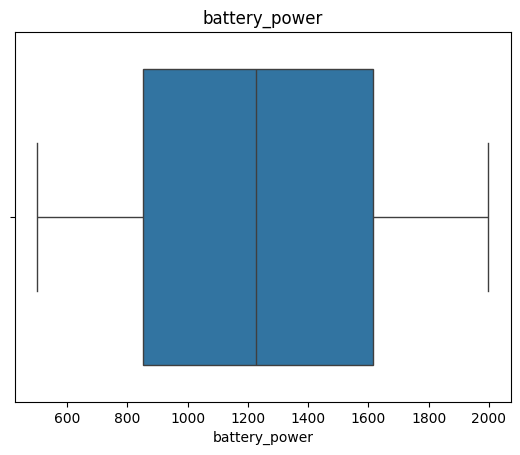

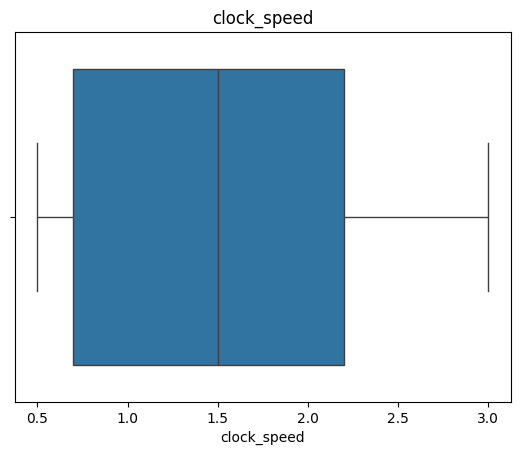

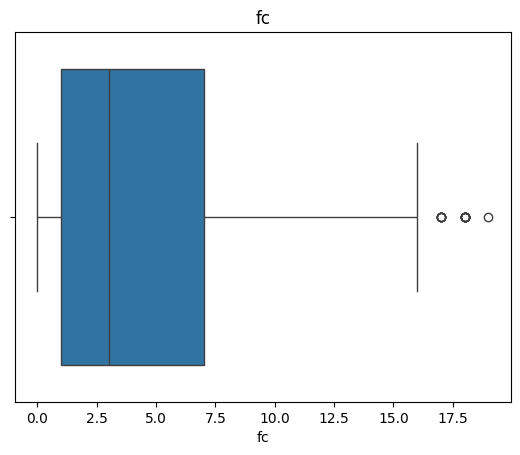

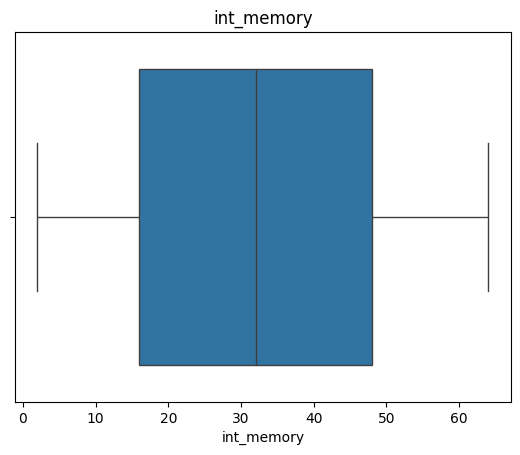

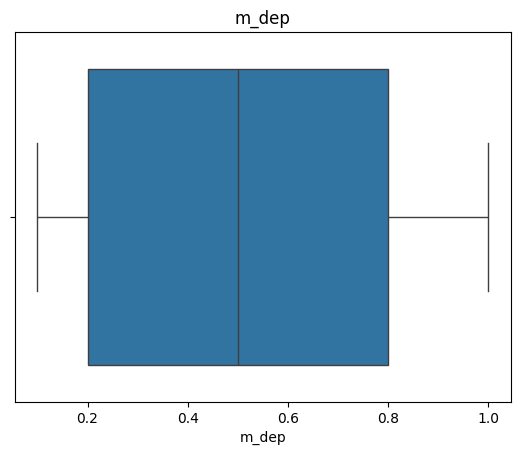

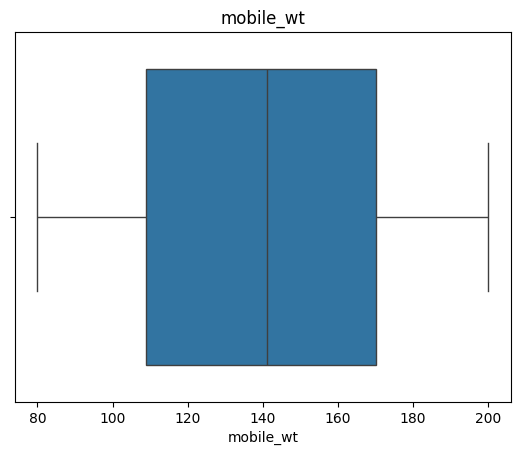

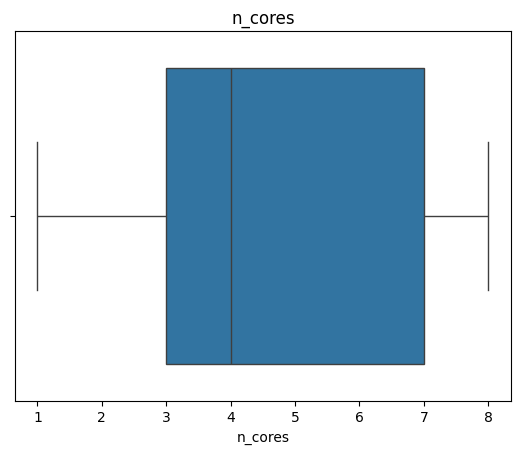

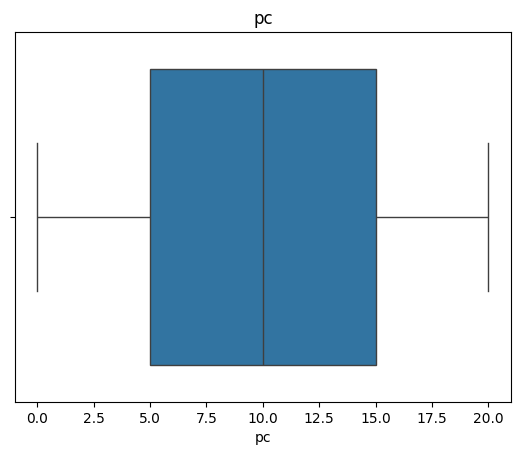

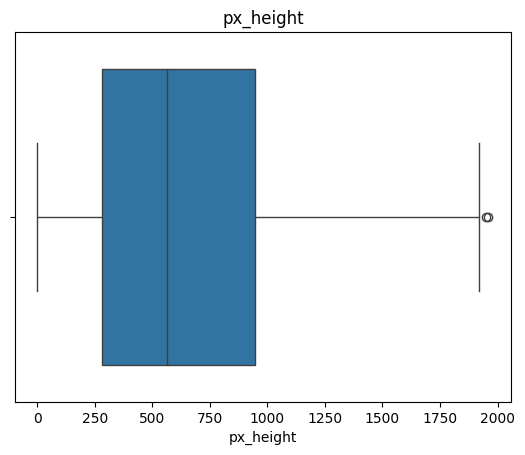

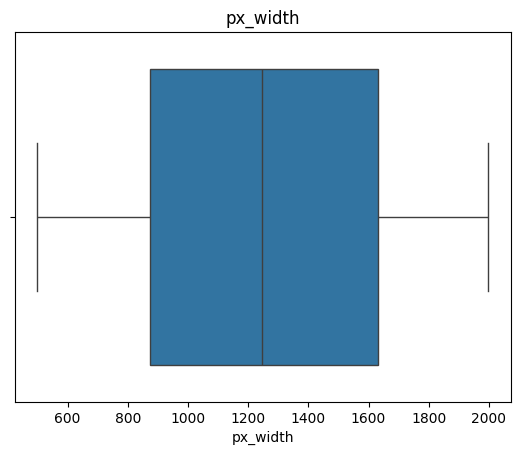

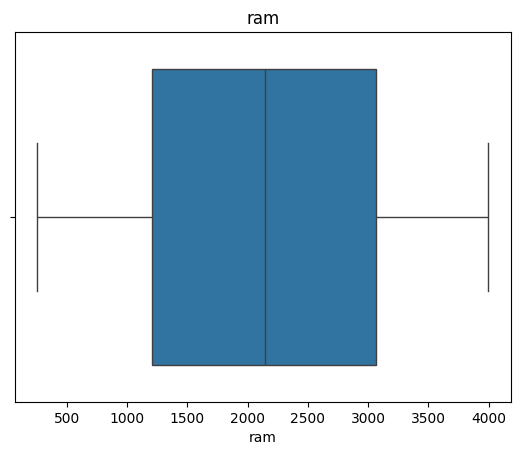

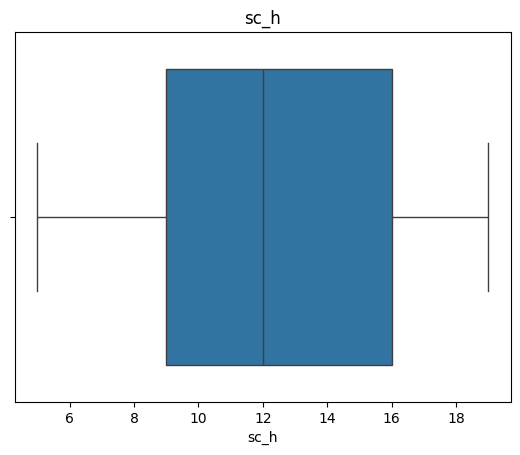

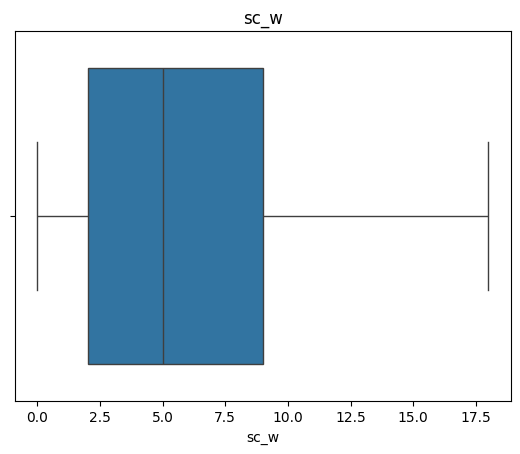

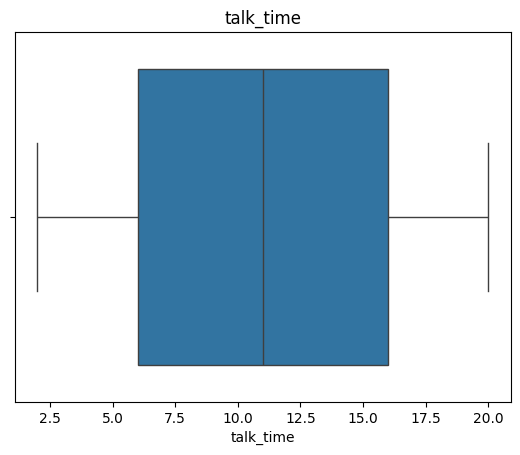

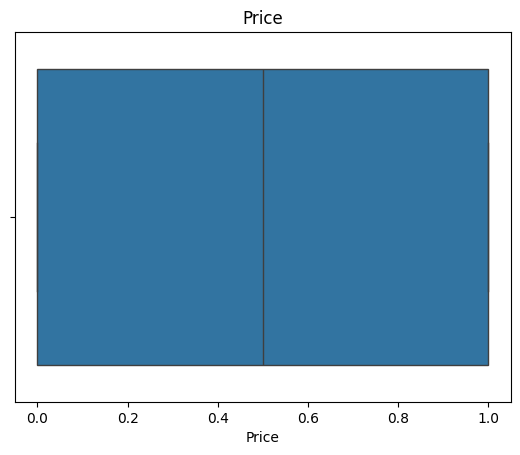

In [11]:
outliers(df)

// fc, px_height, 

In [12]:
df['fc'] = np.where(df['fc']>7.000000, 7.000000, df['fc'])
df['fc'] = np.where(df['fc']<1.000000, 1.000000, df['fc'])

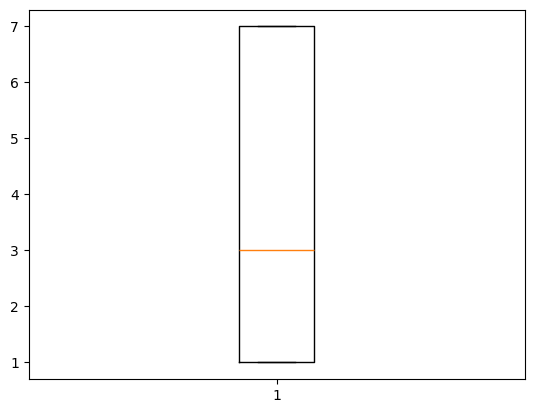

In [13]:
plt.boxplot(df['fc'])
plt.show()

In [14]:
df['px_height'] = np.where(df['px_height']>947.250000, 947.250000, df['px_height'])
df['px_height'] = np.where(df['px_height']<282.750000, 282.750000, df['px_height'])

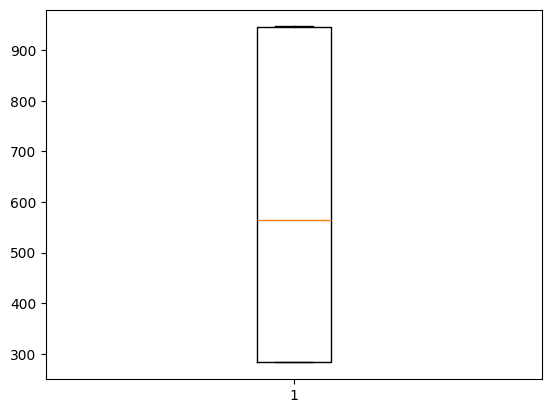

In [15]:
plt.boxplot(df['px_height'])
plt.show()

In [16]:
log_model = LogisticRegression()
Random_model = RandomForestClassifier()
Decision_model = DecisionTreeClassifier()
Gaussian_model = GaussianNB()
Multinomial_model =MultinomialNB()
Bernoulli_model = BernoulliNB()

In [17]:
y = df['Price']
x = df.drop(columns="Price")

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=88)

In [19]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [20]:
print("Training accuracy:", log_model.score(x_train, y_train))
print("Test accuracy:", log_model.score(x_test, y_test))

Training accuracy: 0.89375
Test accuracy: 0.8825


In [21]:
Random_model.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
print("Training accuracy:", Random_model.score(x_train, y_train))
print("Test accuracy:", Random_model.score(x_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.945


In [23]:
Decision_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
print("Training accuracy:", Decision_model.score(x_train, y_train))
print("Test accuracy:", Decision_model.score(x_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.935


In [25]:
Gaussian_model.fit(x_train, y_train)

GaussianNB()

In [26]:
print("Training accuracy:", Gaussian_model.score(x_train, y_train))
print("Test accuracy:", Gaussian_model.score(x_test, y_test))

Training accuracy: 0.933125
Test accuracy: 0.925


In [27]:
Multinomial_model.fit(x_train, y_train)

MultinomialNB()

In [28]:
print("Training accuracy:", Multinomial_model.score(x_train, y_train))
print("Test accuracy:", Multinomial_model.score(x_test, y_test))

Training accuracy: 0.81875
Test accuracy: 0.82


In [29]:
Bernoulli_model.fit(x_train, y_train)

BernoulliNB()

In [30]:
print("Training accuracy:", Bernoulli_model.score(x_train, y_train))
print("Test accuracy:", Bernoulli_model.score(x_test, y_test))

Training accuracy: 0.515625
Test accuracy: 0.5125


In [31]:
print(metrics.classification_report(y_train, log_model.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, log_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       799
           1       0.88      0.91      0.90       801

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600

********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       201
           1       0.87      0.89      0.88       199

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [32]:
print(metrics.classification_report(y_train, Gaussian_model.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, Gaussian_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       799
           1       0.93      0.94      0.93       801

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600

********************************************************************
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       201
           1       0.91      0.94      0.93       199

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.92       400
weighted avg       0.93      0.93      0.92       400



In [33]:
print(metrics.classification_report(y_train, Multinomial_model.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, Multinomial_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       799
           1       0.79      0.88      0.83       801

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600

********************************************************************
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       201
           1       0.78      0.88      0.83       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [34]:
print(metrics.classification_report(y_train, Bernoulli_model.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, Bernoulli_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.56      0.15      0.23       799
           1       0.51      0.88      0.65       801

    accuracy                           0.52      1600
   macro avg       0.53      0.52      0.44      1600
weighted avg       0.53      0.52      0.44      1600

********************************************************************
              precision    recall  f1-score   support

           0       0.56      0.15      0.24       201
           1       0.51      0.88      0.64       199

    accuracy                           0.51       400
   macro avg       0.53      0.51      0.44       400
weighted avg       0.53      0.51      0.44       400



In [35]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'Price'],
      dtype='object')

In [36]:
f = {'battery_power':[1313, 551], 'clock_speed':[1.8, 2.8], 'fc':[4, 0], 'int_memory':[9, 54], 'm_dep':[.4, .1],
       'mobile_wt':[105, 172], 'n_cores':[1, 7], 'pc':[6, 15], 'px_height':[416, 169], 'px_width':[1308, 1916], 'ram':[3791, 1414], 'sc_h':[11, 6],
       'sc_w':[10, 1], 'talk_time':[6, 19]}

In [37]:
ff = pd.DataFrame(f)

In [38]:
log_model.predict(ff)

array([1, 0], dtype=int64)

In [39]:
print(metrics.classification_report(y_train, log_model.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, log_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       799
           1       0.88      0.91      0.90       801

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600

********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       201
           1       0.87      0.89      0.88       199

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [40]:
Decision_model.predict(ff)

array([1, 0], dtype=int64)

In [41]:
Random_model.predict(ff)

array([1, 0], dtype=int64)

In [42]:
Gaussian_model.predict(ff)

array([1, 0], dtype=int64)

In [43]:
print(metrics.classification_report(y_train, Gaussian_model.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, Gaussian_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       799
           1       0.93      0.94      0.93       801

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600

********************************************************************
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       201
           1       0.91      0.94      0.93       199

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.92       400
weighted avg       0.93      0.93      0.92       400



In [44]:
Multinomial_model.predict(ff)

array([1, 0], dtype=int64)

In [45]:
Bernoulli_model.predict(ff)

array([1, 1], dtype=int64)

# Applying KNN 

In [46]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
0,842,2.2,1.0,7,0.6,188,2,2,282.75,756,2549,9,7,19,0
1,1021,0.5,1.0,53,0.7,136,3,6,905.00,1988,2631,17,3,7,1
2,563,0.5,2.0,41,0.9,145,5,6,947.25,1716,2603,11,2,9,1
3,615,2.5,1.0,10,0.8,131,6,9,947.25,1786,2769,16,8,11,1
4,1821,1.2,7.0,44,0.6,141,2,14,947.25,1212,1411,8,2,15,0


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
Y = df['Price']
X = df.drop(columns='Price')

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=881)

In [50]:
knn = KNeighborsClassifier(n_neighbors=17)

In [51]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=17)

In [52]:
print("Training accuracy:", knn.score(x_train, y_train))
print("Test accuracy:", knn.score(x_test, y_test))

Training accuracy: 0.974375
Test accuracy: 0.975


In [53]:
print(metrics.classification_report(y_train, knn.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, knn.predict(x_test)))print(metrics.classification_report(y_train, knn.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       799
           1       0.97      0.97      0.97       801

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600

********************************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       201
           1       0.97      0.97      0.97       199

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [54]:
k = []
tr = []
te = []

for i in range(3, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print("KNeighborsClassifier:", i)
    k.append(i)

    print("Train accuracy:", knn.score(x_train, y_train))
    tr.append(round(knn.score(x_train, y_train),2))
    print("Test accuracy:", knn.score(x_test, y_test))
    te.append(round(knn.score(x_test, y_test),2))

    print("**********************************")

KNeighborsClassifier: 3
Train accuracy: 0.98375
Test accuracy: 0.9675
**********************************
KNeighborsClassifier: 5
Train accuracy: 0.980625
Test accuracy: 0.9725
**********************************
KNeighborsClassifier: 7
Train accuracy: 0.97875
Test accuracy: 0.9675
**********************************
KNeighborsClassifier: 9
Train accuracy: 0.976875
Test accuracy: 0.9675
**********************************
KNeighborsClassifier: 11
Train accuracy: 0.975
Test accuracy: 0.97
**********************************
KNeighborsClassifier: 13
Train accuracy: 0.975625
Test accuracy: 0.9675
**********************************
KNeighborsClassifier: 15
Train accuracy: 0.9725
Test accuracy: 0.9675
**********************************
KNeighborsClassifier: 17
Train accuracy: 0.97375
Test accuracy: 0.97
**********************************
KNeighborsClassifier: 19
Train accuracy: 0.975
Test accuracy: 0.9725
**********************************


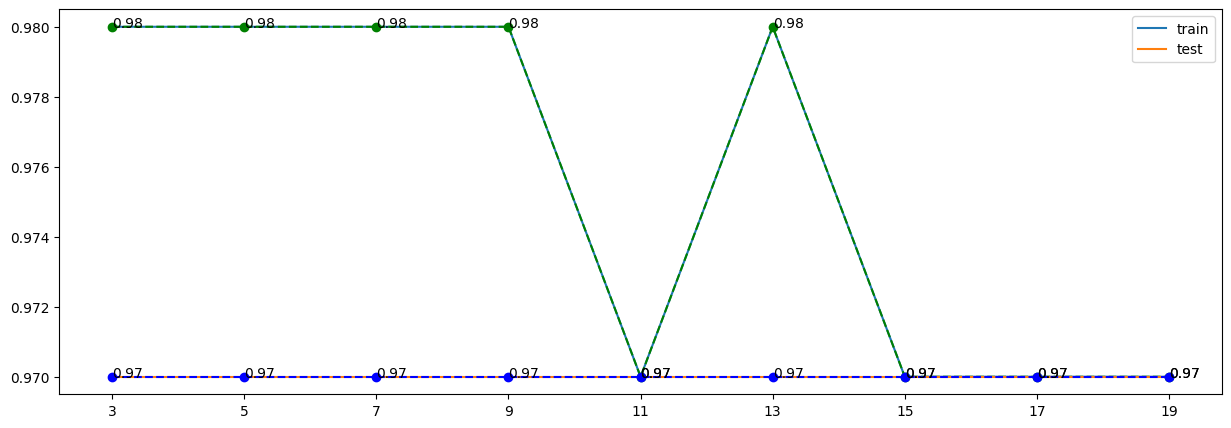

In [55]:
plt.figure(figsize=(15, 5))
plt.plot(k, tr, label="train")
plt.plot(k, tr, "go--")

plt.plot(k, te, label="test")
plt.plot(k, te, "bo--")

for x,y in zip(k, tr):
    plt.text(x, y, y)

for x,y in zip(k, te):
   plt.text(x, y, y)

plt.xticks(k)
plt.legend()
plt.show()

# SVM 

In [56]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
0,842,2.2,1.0,7,0.6,188,2,2,282.75,756,2549,9,7,19,0
1,1021,0.5,1.0,53,0.7,136,3,6,905.00,1988,2631,17,3,7,1
2,563,0.5,2.0,41,0.9,145,5,6,947.25,1716,2603,11,2,9,1
3,615,2.5,1.0,10,0.8,131,6,9,947.25,1786,2769,16,8,11,1
4,1821,1.2,7.0,44,0.6,141,2,14,947.25,1212,1411,8,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,1.0,2,0.8,106,6,14,947.25,1890,668,13,4,19,0
1996,1965,2.6,1.0,39,0.2,187,4,3,915.00,1965,2032,11,10,16,1
1997,1911,0.9,1.0,36,0.7,108,8,3,868.00,1632,3057,9,1,5,1
1998,1512,0.9,4.0,46,0.1,145,5,5,336.00,670,869,18,10,19,0


In [57]:
from sklearn import svm

In [58]:
svm_model = svm.SVC()

In [59]:
svm_model.fit(x_train, y_train)

SVC()

In [60]:
print("Training accuracy:", svm_model.score(x_train, y_train))
print("Training accuracy:", svm_model.score(x_train, y_train))

Training accuracy: 0.978125
Training accuracy: 0.978125


In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()

In [63]:
sc_fit = sc.fit(x_train)

In [64]:
x_train_sc = sc_fit.transform(x_train)

In [65]:
sc_fit_test = sc.fit(x_test)

In [66]:
x_test_sc = sc_fit_test.transform(x_test)

In [67]:
x_train_sc

array([[ 0.17271178,  0.3437128 ,  0.14287219, ..., -0.30075104,
         0.98391016, -0.9149827 ],
       [-1.56439381,  1.58455324, -1.05187782, ..., -1.49479985,
        -1.10304025,  1.46546009],
       [ 1.0458239 ,  0.21962876, -1.05187782, ..., -1.73360961,
        -1.33492362, -1.28120466],
       ...,
       [ 1.68413042, -1.02121168,  0.14287219, ...,  1.13210752,
         1.21579354,  0.36679419],
       [ 0.51694136, -1.26937977, -1.05187782, ...,  0.17686848,
         0.05637665,  1.46546009],
       [-0.10540749, -0.27670742,  1.33762219, ...,  0.41567824,
        -0.63927349, -0.36564975]])

In [68]:
x_train1 =  pd.DataFrame(x_train_sc, columns=x_train.columns)

In [69]:
x_train1

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.172712,0.343713,0.142872,-1.292122,-0.379862,-0.992020,-1.526632,-0.629770,-0.689365,0.118031,1.534209,-0.300751,0.983910,-0.914983
1,-1.564394,1.584553,-1.051878,1.219698,-1.427757,0.901781,1.084856,0.867207,-1.182431,1.529350,-0.653296,-1.494800,-1.103040,1.465460
2,1.045824,0.219629,-1.051878,-1.068849,1.366630,-1.218145,-0.656136,-1.295093,-1.182431,-1.126158,-1.473265,-1.733610,-1.334924,-1.281205
3,-0.506629,-0.897128,0.541122,-1.124667,-0.030564,-1.076817,-0.656136,0.700876,-0.989090,-1.342034,0.155630,-1.733610,-1.103040,-1.647427
4,-0.173797,-0.276707,-1.051878,-0.622303,0.318735,-0.398440,1.520104,0.368215,-1.088998,-0.204622,1.115482,-1.494800,-0.407390,0.549905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-1.550716,0.095545,-1.051878,-0.454849,-0.030564,-0.426706,-0.656136,-1.627754,1.276424,0.134280,-0.753606,-0.061941,0.520143,-1.464316
1596,-0.960282,-1.269380,0.142872,-1.013031,1.366630,1.636689,-0.656136,0.534545,-1.182431,-1.622905,-1.017726,1.132108,0.983910,0.733016
1597,1.684130,-1.021212,0.142872,-0.008303,1.017331,0.873516,-1.091384,-0.463439,1.276424,1.543278,1.449543,1.132108,1.215794,0.366794
1598,0.516941,-1.269380,-1.051878,-0.845576,0.668033,0.364733,0.649608,-0.297108,-0.681965,0.194632,-0.779374,0.176868,0.056377,1.465460


In [70]:
x_test1 =  pd.DataFrame(x_test_sc, columns=x_test.columns)

In [71]:
x_test1

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1.542054,1.733438,-1.051756,-0.822490,1.106817,0.963507,1.526769,0.090227,1.381682,-0.325260,0.044143,-1.276528,-0.620824,1.450739
1,1.007939,1.031049,-1.051756,-0.980282,1.446071,0.765952,-1.145912,-0.230580,-0.200963,-1.271463,-0.886367,-0.114992,1.148220,1.084968
2,-0.895413,-0.022535,0.154847,0.229456,-0.589454,0.286174,-0.255018,0.892246,-1.085574,-1.608247,0.151975,-0.579606,-0.841954,1.450739
3,1.073572,1.148113,1.361451,-1.348463,-1.267963,1.189285,0.190428,0.892246,-0.041307,-0.570402,1.514740,-1.276528,-1.063085,-0.561001
4,-1.454423,0.211595,-0.247354,-1.348463,1.106817,0.794174,-0.255018,0.090227,0.901783,1.370116,0.488483,0.349622,0.484829,-0.378116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.135312,-1.193183,-1.051756,0.229456,0.767563,-0.052493,-0.700465,-1.513811,1.381682,0.135241,-1.704397,-1.044221,-1.284215,-0.926772
396,-1.501950,-0.373730,-1.051756,0.808026,1.446071,-1.407161,-0.700465,-1.513811,1.381682,0.265830,1.232147,0.581929,-1.063085,-0.012345
397,-1.309578,-0.959054,-1.051756,-0.033531,-1.267963,1.245730,0.190428,-1.353407,-0.293787,1.317422,-1.334424,-1.741142,-0.841954,0.719197
398,1.698215,-0.959054,0.557049,-1.401060,-0.250200,1.358619,-1.145912,-0.551388,-1.085574,0.726331,-0.269125,-0.114992,1.148220,1.267854


In [72]:
svm_model.fit(x_train1, y_train)

SVC()

In [73]:
print("Training accuracy:", svm_model.score(x_train1, y_train))
print("Testing accuracy:", svm_model.score(x_test1, y_test))

Training accuracy: 0.99
Testing accuracy: 0.9625


In [74]:
svm_model = svm.SVC(C=1.0, kernel='linear', degree=3)

In [75]:
svm_model.fit(x_train1, y_train)

SVC(kernel='linear')

In [76]:
print("Training accuracy:", svm_model.score(x_train1, y_train))
print("Testing accuracy:", svm_model.score(x_test1, y_test))

Training accuracy: 0.983125
Testing accuracy: 0.9725


In [79]:
print(metrics.classification_report(y_train, svm_model.predict(x_train1)))
print("********************************************************************")
print(metrics.classification_report(y_test, svm_model.predict(x_test1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       799
           1       0.98      0.99      0.98       801

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

********************************************************************
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       201
           1       0.97      0.98      0.97       199

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

